# Using EcoFOCIpy to apply a 35hr Lanzcos Filter to 2D data (xarray)

- input:
    - example uses erddap but other versions may use netcdf file
- output is currently only csv files for each depth (exported from a pandas dataframe (so you could just continue analysis)

TODO:
- output to xarray modified netcdf file

In [1]:
import xarray as xa
import pandas as pd
import numpy as np
from erddapy import ERDDAP

import EcoFOCIpy.math.lanzcos as lanzcos 
import EcoFOCIpy.plots.TimeSeriesStickPlot as TimeseriesStickPlot

In [2]:
dataset = 'ADCP_Mooring_18ckp3a_final'

dataset_id = dataset.split('_')[-2]

ecofoci_server_url='http://ecofoci-field.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=ecofoci_server_url,
           protocol="griddap",)

e.dataset_id = dataset

ds = e.to_xarray()

In [3]:
ds

<xarray.Dataset>
Dimensions:        (time: 8779, depth: 7, latitude: 1, longitude: 1)
Coordinates:
  * time           (time) datetime64[ns] 2018-08-12T20:00:00 ... 2019-08-13T1...
  * depth          (depth) float64 8.0 12.0 16.0 20.0 24.0 28.0 32.0
  * latitude       (latitude) float32 71.82
  * longitude      (longitude) float64 193.9
Data variables:
    vcomp_current  (time, depth, latitude, longitude) float32 ...
    ucomp_current  (time, depth, latitude, longitude) float32 ...
    w_1204         (time, depth, latitude, longitude) float32 ...
    Werr_1201      (time, depth, latitude, longitude) float32 ...
Attributes: (12/37)
    cdm_data_type:                 Grid
    COMPOSITE:                     1
    Conventions:                   COARDS, CF-1.6, ACDD-1.3
    CREATION_DATE:                 March 11, 2020 21:03 UTC
    creation_date:                 April 16, 2020 21:06 UTC
    DATA_CMNT:                     1705.VEL
    ...                            ...
    time_coverage_end:             2019-08-13T14:00:00Z
    time_coverage_start:           2018-08-12T20:00:00Z
    title:                         QC'd (final) ADCP Vel Data from 18CKP-3A
    WATER_DEPTH:                   47.0
    WATER_MASS:                    B
    Westernmost_Easting:           193.9415283203125

depth: <xarray.Dataset>
Dimensions:        (time: 8779, latitude: 1, longitude: 1)
Coordinates:
  * time           (time) datetime64[ns] 2018-08-12T20:00:00 ... 2019-08-13T1...
    depth          float64 32.0
  * latitude       (latitude) float32 71.82
  * longitude      (longitude) float64 193.9
Data variables:
    vcomp_current  (time, latitude, longitude) float32 -10.58 -8.012 ... 4.965
    ucomp_current  (time, latitude, longitude) float32 3.192 0.9286 ... 7.655
    w_1204         (time, latitude, longitude) float32 0.2 0.3 0.0 ... -0.1 0.0
    Werr_1201      (time, latitude, longitude) float32 -0.1 -0.2 0.2 ... 0.1 0.6
Attributes: (12/37)
    cdm_data_type:                 Grid
    COMPOSITE:                     1
    Conventions:                   COARDS, CF-1.6, ACDD-1.3
    CREATION_DATE:                 March 11, 2020 21:03 UTC
    creation_date:                 April 16, 2020 21:06 UTC
    DATA_CMNT:                     1705.VEL
    ...                            ...
    time

/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_14703/941112229.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ufdata'][missing_index_u] = np.nan
/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_14703/941112229.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['vfdata'][missing_index_v] = np.nan
/Users/bell/Programs/EcoFOCIpy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:120: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)


depth: <xarray.Dataset>
Dimensions:        (time: 8779, latitude: 1, longitude: 1)
Coordinates:
  * time           (time) datetime64[ns] 2018-08-12T20:00:00 ... 2019-08-13T1...
    depth          float64 28.0
  * latitude       (latitude) float32 71.82
  * longitude      (longitude) float64 193.9
Data variables:
    vcomp_current  (time, latitude, longitude) float32 -9.421 -7.985 ... 5.336
    ucomp_current  (time, latitude, longitude) float32 3.003 -0.2876 ... 5.69
    w_1204         (time, latitude, longitude) float32 -0.1 0.2 0.0 ... -0.1 0.0
    Werr_1201      (time, latitude, longitude) float32 0.0 0.7 0.4 ... 0.3 0.3
Attributes: (12/37)
    cdm_data_type:                 Grid
    COMPOSITE:                     1
    Conventions:                   COARDS, CF-1.6, ACDD-1.3
    CREATION_DATE:                 March 11, 2020 21:03 UTC
    creation_date:                 April 16, 2020 21:06 UTC
    DATA_CMNT:                     1705.VEL
    ...                            ...
    time_

/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_14703/941112229.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ufdata'][missing_index_u] = np.nan
/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_14703/941112229.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['vfdata'][missing_index_v] = np.nan
/Users/bell/Programs/EcoFOCIpy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:120: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)


depth: <xarray.Dataset>
Dimensions:        (time: 8779, latitude: 1, longitude: 1)
Coordinates:
  * time           (time) datetime64[ns] 2018-08-12T20:00:00 ... 2019-08-13T1...
    depth          float64 24.0
  * latitude       (latitude) float32 71.82
  * longitude      (longitude) float64 193.9
Data variables:
    vcomp_current  (time, latitude, longitude) float32 -7.748 -7.773 ... 5.695
    ucomp_current  (time, latitude, longitude) float32 5.456 1.279 ... 4.333
    w_1204         (time, latitude, longitude) float32 -0.2 0.0 ... -0.1 0.1
    Werr_1201      (time, latitude, longitude) float32 0.2 0.0 -0.4 ... 0.1 -0.5
Attributes: (12/37)
    cdm_data_type:                 Grid
    COMPOSITE:                     1
    Conventions:                   COARDS, CF-1.6, ACDD-1.3
    CREATION_DATE:                 March 11, 2020 21:03 UTC
    creation_date:                 April 16, 2020 21:06 UTC
    DATA_CMNT:                     1705.VEL
    ...                            ...
    time_cov

/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_14703/941112229.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ufdata'][missing_index_u] = np.nan
/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_14703/941112229.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['vfdata'][missing_index_v] = np.nan
/Users/bell/Programs/EcoFOCIpy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:120: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)


depth: <xarray.Dataset>
Dimensions:        (time: 8779, latitude: 1, longitude: 1)
Coordinates:
  * time           (time) datetime64[ns] 2018-08-12T20:00:00 ... 2019-08-13T1...
    depth          float64 20.0
  * latitude       (latitude) float32 71.82
  * longitude      (longitude) float64 193.9
Data variables:
    vcomp_current  (time, latitude, longitude) float32 -7.229 -9.01 ... 6.003
    ucomp_current  (time, latitude, longitude) float32 8.099 2.979 ... 3.78
    w_1204         (time, latitude, longitude) float32 -0.2 -0.2 ... -0.1 -0.1
    Werr_1201      (time, latitude, longitude) float32 -0.7 -0.6 ... -0.2 -0.1
Attributes: (12/37)
    cdm_data_type:                 Grid
    COMPOSITE:                     1
    Conventions:                   COARDS, CF-1.6, ACDD-1.3
    CREATION_DATE:                 March 11, 2020 21:03 UTC
    creation_date:                 April 16, 2020 21:06 UTC
    DATA_CMNT:                     1705.VEL
    ...                            ...
    time_cover

/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_14703/941112229.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ufdata'][missing_index_u] = np.nan
/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_14703/941112229.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['vfdata'][missing_index_v] = np.nan
/Users/bell/Programs/EcoFOCIpy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:120: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)


depth: <xarray.Dataset>
Dimensions:        (time: 8779, latitude: 1, longitude: 1)
Coordinates:
  * time           (time) datetime64[ns] 2018-08-12T20:00:00 ... 2019-08-13T1...
    depth          float64 16.0
  * latitude       (latitude) float32 71.82
  * longitude      (longitude) float64 193.9
Data variables:
    vcomp_current  (time, latitude, longitude) float32 -6.082 -6.418 ... 6.151
    ucomp_current  (time, latitude, longitude) float32 9.028 3.265 ... 2.994
    w_1204         (time, latitude, longitude) float32 -0.2 -0.3 ... 0.0 -0.2
    Werr_1201      (time, latitude, longitude) float32 0.6 0.0 0.1 ... -0.3 -0.9
Attributes: (12/37)
    cdm_data_type:                 Grid
    COMPOSITE:                     1
    Conventions:                   COARDS, CF-1.6, ACDD-1.3
    CREATION_DATE:                 March 11, 2020 21:03 UTC
    creation_date:                 April 16, 2020 21:06 UTC
    DATA_CMNT:                     1705.VEL
    ...                            ...
    time_co

/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_14703/941112229.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ufdata'][missing_index_u] = np.nan
/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_14703/941112229.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['vfdata'][missing_index_v] = np.nan
/Users/bell/Programs/EcoFOCIpy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:120: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)


depth: <xarray.Dataset>
Dimensions:        (time: 8779, latitude: 1, longitude: 1)
Coordinates:
  * time           (time) datetime64[ns] 2018-08-12T20:00:00 ... 2019-08-13T1...
    depth          float64 12.0
  * latitude       (latitude) float32 71.82
  * longitude      (longitude) float64 193.9
Data variables:
    vcomp_current  (time, latitude, longitude) float32 -5.595 -6.271 ... 4.903
    ucomp_current  (time, latitude, longitude) float32 12.38 7.873 ... 3.674
    w_1204         (time, latitude, longitude) float32 -0.1 0.0 ... -0.2 -0.3
    Werr_1201      (time, latitude, longitude) float32 -0.8 0.2 ... -0.4 1.1
Attributes: (12/37)
    cdm_data_type:                 Grid
    COMPOSITE:                     1
    Conventions:                   COARDS, CF-1.6, ACDD-1.3
    CREATION_DATE:                 March 11, 2020 21:03 UTC
    creation_date:                 April 16, 2020 21:06 UTC
    DATA_CMNT:                     1705.VEL
    ...                            ...
    time_covera

/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_14703/941112229.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ufdata'][missing_index_u] = np.nan
/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_14703/941112229.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['vfdata'][missing_index_v] = np.nan
/Users/bell/Programs/EcoFOCIpy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:120: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)


depth: <xarray.Dataset>
Dimensions:        (time: 8779, latitude: 1, longitude: 1)
Coordinates:
  * time           (time) datetime64[ns] 2018-08-12T20:00:00 ... 2019-08-13T1...
    depth          float64 8.0
  * latitude       (latitude) float32 71.82
  * longitude      (longitude) float64 193.9
Data variables:
    vcomp_current  (time, latitude, longitude) float32 -4.403 -6.329 ... 11.48
    ucomp_current  (time, latitude, longitude) float32 11.99 9.795 ... 2.78
    w_1204         (time, latitude, longitude) float32 -0.1 -0.2 ... -0.4 -1.1
    Werr_1201      (time, latitude, longitude) float32 0.1 0.1 0.1 ... -0.4 1.4
Attributes: (12/37)
    cdm_data_type:                 Grid
    COMPOSITE:                     1
    Conventions:                   COARDS, CF-1.6, ACDD-1.3
    CREATION_DATE:                 March 11, 2020 21:03 UTC
    creation_date:                 April 16, 2020 21:06 UTC
    DATA_CMNT:                     1705.VEL
    ...                            ...
    time_cove

/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_14703/941112229.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ufdata'][missing_index_u] = np.nan
/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_14703/941112229.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['vfdata'][missing_index_v] = np.nan
/Users/bell/Programs/EcoFOCIpy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:120: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)


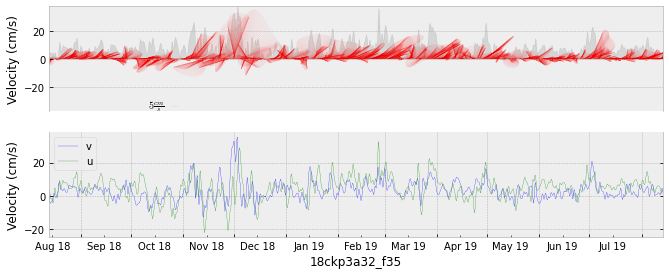

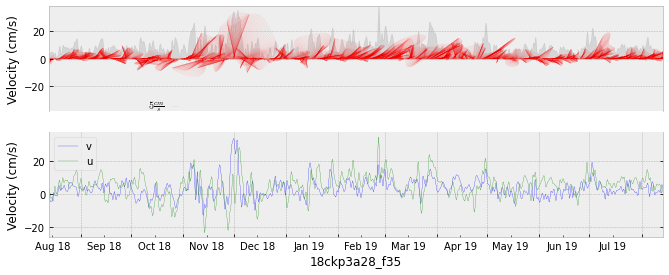

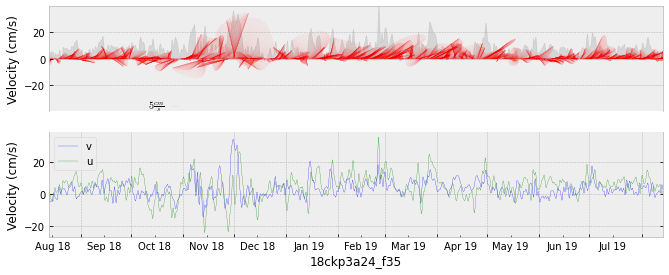

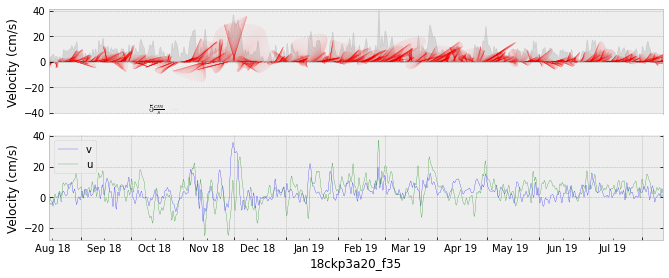

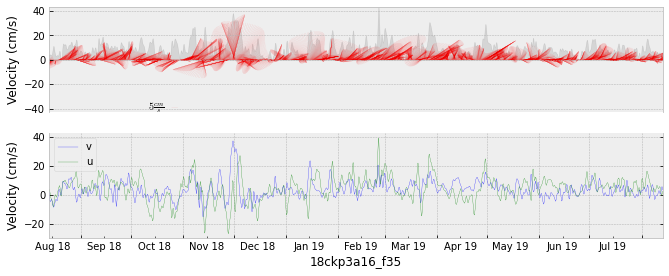

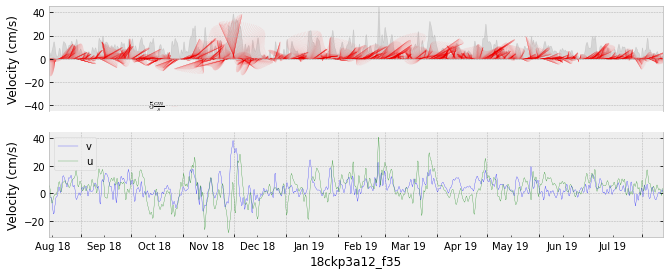

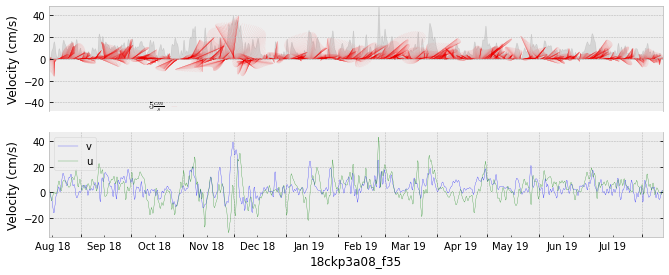

In [4]:

plotfigs = True
verbose = False
savedata = True
domath = False

for dd in range(ds.depth.size-1,-1,-1):
    udata, vdata = None,None
    depth_curr = ds.isel(depth=dd)
    print(f'depth: {depth_curr}, {dd}')
    ### filter
    try:
        udata = depth_curr.u_curr_comp[0,0,:].to_pandas()
        vdata = depth_curr.v_curr_comp[0,0,:].to_pandas()
    except:
        udata = depth_curr.ucomp_current[:,0,0].to_pandas()
        vdata = depth_curr.vcomp_current[:,0,0].to_pandas()
        
    data = pd.concat([udata, vdata], axis=1)
    data.columns = ['udata','vdata']

    data['udata'][data.udata > 1e34]=np.nan
    data['vdata'][data.vdata > 1e34]=np.nan
    data = data.resample('1H').mean()

    ## missing data fill limited by number of hours to linearly interpolate
    data['tempu'] = data['udata'].interpolate(method='time',limit=6)
    data['tempv'] = data['vdata'].interpolate(method='time',limit=6)

    # get index of missing data that wasn't filled
    # the remaining missing data will continue to be missing after analysis
    # this data and the edges of the timeseries need to have the effects of the filter window accounted for

    missing_index_u = np.isnan(data.tempu)
    missing_index_v = np.isnan(data.tempv)
    data['tempu'] = data['udata'].interpolate(method='time')
    data['tempv'] = data['vdata'].interpolate(method='time')

    #filter data with rudimentary matlab script
    data['ufdata'] = lanzcos.lanzcos(data.tempu.values,1,35)+data['udata'].mean()
    data['vfdata'] = lanzcos.lanzcos(data.tempv.values,1,35)+data['vdata'].mean()
    data['ufdata'][missing_index_u] = np.nan
    data['vfdata'][missing_index_v] = np.nan    

    #extra calculations
    if domath:
        print(dataset_id)
        print(data.describe()[['ufdata','vfdata']])

    #plot
    if plotfigs:
        try:
            p1 = TimeseriesStickPlot.Timeseries1dStickPlot()
            plt1, fig1 = p1.plot(timedata=data.index, 
                                 udata=data.ufdata.values, 
                                 vdata=data.vfdata.values,
                                 rotate=0)
            plt1.xlabel(dataset_id+str(int(ds.depth[dd].values)).zfill(2)+'_f35')
            fig1.savefig(dataset_id+str(int(ds.depth[dd].values)).zfill(2)+'_f35'+'.png',dpi=600)

            if verbose:
                #subsample
                datasub=data.resample('D').median()
                p1 = TimeseriesStickPlot.Timeseries1dStickPlot()
                plt1, fig1 = p1.plot(timedata=datasub.index, 
                                     udata=datasub.ufdata.values, 
                                     vdata=datasub.vfdata.values,
                                     linescale=10,
                                     rotate=0)
                plt1.xlabel(dataset_id+str(int(ds.depth[dd].values)).zfill(2)+'_f35_daily')
                fig1.savefig(dataset_id+str(int(ds.depth[dd].values)).zfill(2)+'_f35_daily'+'.png',dpi=600)

                p1 = TimeseriesStickPlot.Timeseries1dStickPlot()
                plt1, fig1 = p1.plot(timedata=data.index, 
                                     udata=data.udata.values, 
                                     vdata=data.vdata.values,
                                     rotate=0)
                plt1.xlabel(dataset_id+str(int(ds.depth[dd].values)).zfill(2)+'_nofilter')
                fig1.savefig(dataset_id+str(int(ds.depth[dd].values)).zfill(2)+'_nofilter'+'.png',dpi=600)
        except:
            pass
    #save data
    if savedata:
        data[['ufdata','vfdata']].to_csv(dataset_id+'_'+str(int(ds.depth[dd].values)).zfill(2)+'_f35'+'.csv')